# With metric provided, get the cartesian permittivity tensor

In [1]:
import sympy as sp
from IPython.display import Math

In [2]:
r= sp.symbols('r', real=True, positive=True)
theta= sp.symbols('theta', real=True)
x, y, z = sp.symbols('x y z', real=True)
M = sp.symbols('M')

In [3]:
g_ij_sph = sp.Matrix([[1/(1-(M/r)), 0, 0],
                       [0, r**2, 0],
                       [0, 0, r**2 * sp.sin(theta)]])

gij_sph = g_ij_sph.inv()


display(Math(r'[g_{ij}] = '+ sp.latex(g_ij_sph)))
display(Math(r'[g^{ij}] = '+ sp.latex(gij_sph)))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

# Have metric in sphericals, need to convert to cartesian

$\delta^{ij} = \frac{\partial x^{i'}}{\partial x^{i}} \frac{\partial x^{j'}}{\partial x^{j}} g_{i'j'}$

$\delta^{00} = \left(\frac{\partial r}{\partial x}\right)^2 g_{00} + \left(\frac{\partial \theta}{\partial x}\right)^2 g_{11} + \left(\frac{\partial \phi}{\partial x}\right)^2 g_{22}$


$\delta^{01} = \frac{\partial r}{\partial x} \frac{\partial r}{\partial y} g_{00} + \frac{\partial \theta}{\partial x} \frac{\partial \theta}{\partial y} g_{11} + \frac{\partial \phi}{\partial x} \frac{\partial \phi}{\partial y} g_{22}$

$\delta^{02} = \frac{\partial r}{\partial x} \frac{\partial r}{\partial z} g_{00} + \frac{\partial \theta}{\partial x} \frac{\partial \theta}{\partial z} g_{11} + \frac{\partial \phi}{\partial x} \frac{\partial \phi}{\partial z} g_{22}$

$\delta^{10} = \frac{\partial r}{\partial y} \frac{\partial r}{\partial x} g_{00} + \frac{\partial \theta}{\partial y} \frac{\partial \theta}{\partial x} g_{11} + \frac{\partial \phi}{\partial y} \frac{\partial \phi}{\partial x} g_{22}$

$\delta^{11} = \left(\frac{\partial r}{\partial y}\right)^2 g_{00} + \left(\frac{\partial \theta}{\partial y}\right)^2 g_{11} + \left(\frac{\partial \phi}{\partial y}\right)^2 g_{22}$


$\delta^{12} = \frac{\partial r}{\partial y} \frac{\partial r}{\partial z} g_{00} + \frac{\partial \theta}{\partial y} \frac{\partial \theta}{\partial z} g_{11} + \frac{\partial \phi}{\partial y} \frac{\partial \phi}{\partial z} g_{22}$

$\delta^{20} = \frac{\partial r}{\partial z} \frac{\partial r}{\partial x} g_{00} + \frac{\partial \theta}{\partial z} \frac{\partial \theta}{\partial x} g_{11} + \frac{\partial \phi}{\partial z} \frac{\partial \phi}{\partial x} g_{22}$

$\delta^{21} = \frac{\partial r}{\partial z} \frac{\partial r}{\partial y} g_{00} + \frac{\partial \theta}{\partial z} \frac{\partial \theta}{\partial y} g_{11} + \frac{\partial \phi}{\partial z} \frac{\partial \phi}{\partial y} g_{22}$

$\delta^{22} = \left(\frac{\partial r}{\partial z}\right)^2 g_{00} + \left(\frac{\partial \theta}{\partial z}\right)^2 g_{11} + \left(\frac{\partial \phi}{\partial z}\right)^2 g_{22}$


In [4]:
r_cart = (x**2+y**2)**0.5
theta_cart = sp.atan2(y,x)
phi_cart = z

g_ij_sph_cart = g_ij_sph.subs(r, r_cart)
g_ij_sph_cart = g_ij_sph_cart.subs(theta, theta_cart)

In [5]:
g00 = sp.simplify(sp.diff(r_cart, x)*sp.diff(r_cart, x)*g_ij_sph_cart[0,0] 
                  + sp.diff(theta_cart, x)*sp.diff(theta_cart, x)*g_ij_sph_cart[1,1]
                  + sp.diff(phi_cart, x)*sp.diff(phi_cart, x)*g_ij_sph_cart[2,2])
g00

(-1.0*x**2*(x**2 + y**2)**1.0 + y**2*(M - (x**2 + y**2)**0.5)*(x**2 + y**2)**0.5)/((M - (x**2 + y**2)**0.5)*(x**2 + y**2)**1.5)

In [6]:
g01 = sp.simplify(sp.diff(r_cart, x)*sp.diff(r_cart, y)*g_ij_sph_cart[0,0] 
                  + sp.diff(theta_cart, x)*sp.diff(theta_cart, y)*g_ij_sph_cart[1,1]
                  + sp.diff(phi_cart, x)*sp.diff(phi_cart, y)*g_ij_sph_cart[2,2])
g01

-M*x*y*(x**2 + y**2)**0.5/(M*(x**2 + y**2)**1.5 - (x**2 + y**2)**2.0)

In [7]:
g02 = sp.simplify(sp.diff(r_cart, x)*sp.diff(r_cart, z)*g_ij_sph_cart[0,0] 
                  + sp.diff(theta_cart, x)*sp.diff(theta_cart, z)*g_ij_sph_cart[1,1]
                  + sp.diff(phi_cart, x)*sp.diff(phi_cart, z)*g_ij_sph_cart[2,2])
g02

0

In [8]:
g10 = sp.simplify(sp.diff(r_cart, y)*sp.diff(r_cart, x)*g_ij_sph_cart[0,0] 
                  + sp.diff(theta_cart, y)*sp.diff(theta_cart, x)*g_ij_sph_cart[1,1]
                  + sp.diff(phi_cart, y)*sp.diff(phi_cart, x)*g_ij_sph_cart[2,2])
g10

-M*x*y*(x**2 + y**2)**0.5/(M*(x**2 + y**2)**1.5 - (x**2 + y**2)**2.0)

In [9]:
g11 = sp.simplify(sp.diff(r_cart, y)*sp.diff(r_cart, y)*g_ij_sph_cart[0,0] 
                  + sp.diff(theta_cart, y)*sp.diff(theta_cart, y)*g_ij_sph_cart[1,1]
                  + sp.diff(phi_cart, y)*sp.diff(phi_cart, y)*g_ij_sph_cart[2,2])
g11

(x**2*(M - (x**2 + y**2)**0.5)*(x**2 + y**2)**0.5 - 1.0*y**2*(x**2 + y**2)**1.0)/((M - (x**2 + y**2)**0.5)*(x**2 + y**2)**1.5)

In [10]:
g12 = sp.simplify(sp.diff(r_cart, y)*sp.diff(r_cart, z)*g_ij_sph_cart[0,0] 
                  + sp.diff(theta_cart, y)*sp.diff(theta_cart, z)*g_ij_sph_cart[1,1]
                  + sp.diff(phi_cart, y)*sp.diff(phi_cart, z)*g_ij_sph_cart[2,2])
g12

0

In [11]:
g20 = sp.simplify(sp.diff(r_cart, z)*sp.diff(r_cart, x)*g_ij_sph_cart[0,0] 
                  + sp.diff(theta_cart, z)*sp.diff(theta_cart, x)*g_ij_sph_cart[1,1]
                  + sp.diff(phi_cart, z)*sp.diff(phi_cart, x)*g_ij_sph_cart[2,2])
g20

0

In [12]:
g21 = sp.simplify(sp.diff(r_cart, z)*sp.diff(r_cart, y)*g_ij_sph_cart[0,0] 
                  + sp.diff(theta_cart, z)*sp.diff(theta_cart, y)*g_ij_sph_cart[1,1]
                  + sp.diff(phi_cart, z)*sp.diff(phi_cart, y)*g_ij_sph_cart[2,2])
g21

0

In [13]:
g22 = sp.simplify(sp.diff(r_cart, z)*sp.diff(r_cart, z)*g_ij_sph_cart[0,0] 
                  + sp.diff(theta_cart, z)*sp.diff(theta_cart, z)*g_ij_sph_cart[1,1]
                  + sp.diff(phi_cart, z)*sp.diff(phi_cart, z)*g_ij_sph_cart[2,2])
g22

y*(x**2 + y**2)**0.5

In [14]:
gij = sp.Matrix([[g00, g01, g02],
                 [g10, g11, g12],
                 [g20, g21, g22]])

In [15]:
d1 = sp.det(sp.Matrix([[g11, g12],
                       [g21, g22]]))

d2 = sp.det(sp.Matrix([[g10, g12],
                       [g20, g22]]))

d3 = sp.det(sp.Matrix([[g10, g11],
                       [g20, g21]]))

In [16]:
det_gij = g00 * d1 - g01 * d2 + g02 * d3

In [17]:
sp.simplify(det_gij)

1.0*y*(-M**2*x**2*y**2*(M - (x**2 + y**2)**0.5)*(x**2 + y**2)**3.0*(M*(x**2 + y**2)**1.0 - (x**2 + y**2)**1.5) + (M*(x**2 + y**2)**1.5 - (x**2 + y**2)**2.0)**2*(1.0*x**2*(x**2 + y**2)**1.0 + y**2*(-M + (x**2 + y**2)**0.5)*(x**2 + y**2)**0.5)*(-M*x**2*(x**2 + y**2)**0.5 + x**2*(x**2 + y**2)**1.0 + y**2*(x**2 + y**2)**1.0))/((M - (x**2 + y**2)**0.5)*(x**2 + y**2)**1.5*(M*(x**2 + y**2)**1.0 - (x**2 + y**2)**1.5)*(M*(x**2 + y**2)**1.5 - (x**2 + y**2)**2.0)**2)

In [18]:
Eij = (det_gij**2)*gij

In [19]:
Eij_to_eval = Eij.subs(M, '(1)')
Eij_to_eval = Eij_to_eval.subs(x, '(xg)')
Eij_to_eval = Eij_to_eval.subs(y, '(xg)')
Eij_to_eval = Eij_to_eval.subs(z, '(0)')

In [20]:
import numpy as np

grid = np.linspace(-1,1,400)
xg, yg = np.meshgrid(grid, grid)

In [21]:


E = []

for i in range(3):
    for j in range(3):
        E.append(eval(str(Eij_to_eval[i,i])))

In [22]:
import matplotlib.pyplot as plt

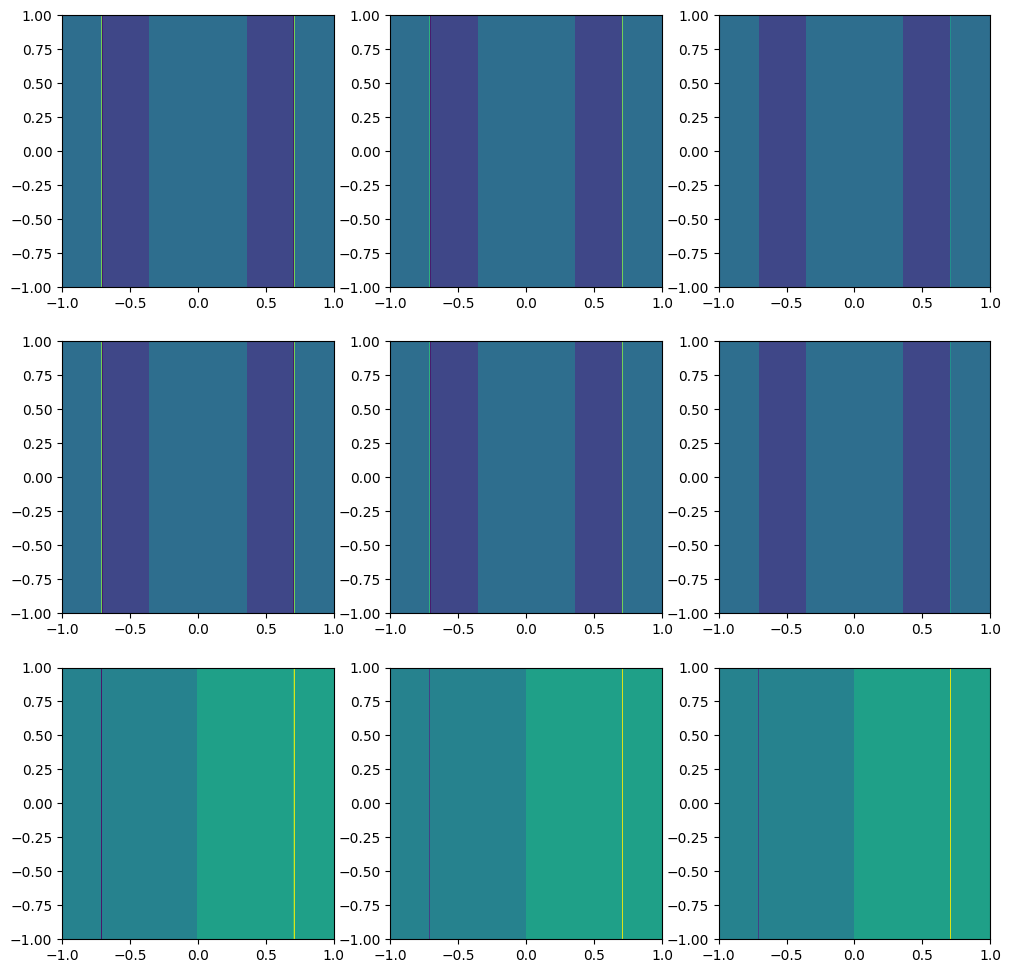

In [23]:
fig = plt.figure(figsize = (12,12))

for i in range(9):
    ax = fig.add_subplot(3,3,i+1)
    ax.set_aspect('equal')
    ax.contourf(xg, yg, E[i])